In [1]:
import os 
from general_plot import *

model_name = model_name_list[0] 


u_bes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
u_random: [    1     5    11    25    57   127   281   609  1315  2837  6117 13179
 28389]
labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
labels after:  ['1 (1)', '5 (2)', '11 (3)', '25 (4)', '57 (5)', '127 (6)', '281 (7)', '609 (8)', '1315 (9)', '2837 (10)', '6117 (11)', '13179 (12)', '28389 (13)']


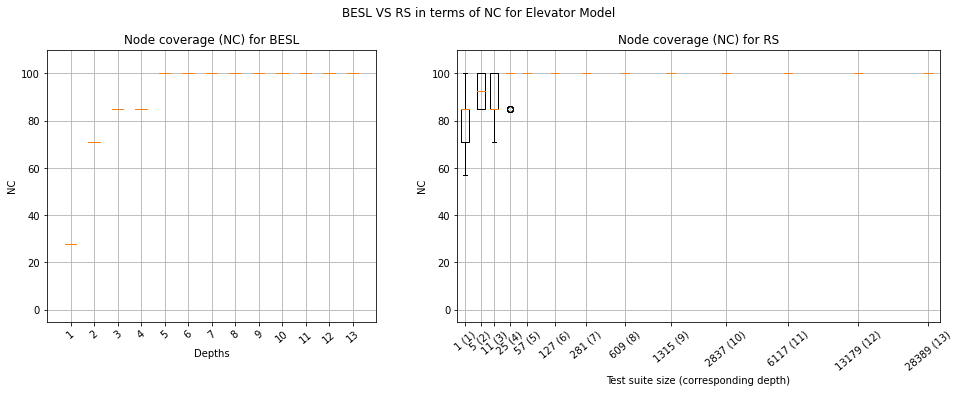

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map = {
    'need_y_limit' : True,
    'need_positions' : True,
#     'positions' : [1, 2.5, 4.25, 6.25, 6, 8, 10.1, 14, 17, 20.2, 24, 30, 38],
#     'positions' : [1, 2.5, 4.25, 6.25, 8.5, 12, 16, 21, 27, 34, 42, 51, 60],
    'positions' : [1, 3, 4.75, 6.75, 9, 12.5, 16.5, 21.5, 27.5, 34.5, 42.5, 51.5, 60.5],

    'need_xtick' : True,
    'model_name': model_name,
    'model_name_to_view': model_name_to_view_list[0],
    'loopOpt': bool_to_str(loopOpt),
    
    'bes_title': f'Node coverage (NC) for BES{bool_to_shortcut(loopOpt)}',
    'rand_title': 'Node coverage (NC) for RS',
    
    'x_bes_label': 'Depths',
    'x_rand_label': 'Test suite size (corresponding depth)',
    
    'y_bes_label': 'NC',
    'y_rand_label': 'NC',
    
    'box_width_bes' : .6,
    'box_width_rand' : 1,
    
    'x_bes_lim': 14,
    'x_rand_lim' : 62,
    
    'y_bes_lim': 110,
    'y_rand_lim' : 110,
    'y_min_lim': -5,
    
    'width_bes_ratio': 1.5,
    'width_rand_ratio': 2.2,
    
    'distance_to_figures': 1,
    'fig_width': 16

}



compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
labels after:  ['1 (1)', '5 (2)', '11 (3)', '25 (4)', '57 (5)', '127 (6)', '281 (7)', '609 (8)', '1315 (9)', '2837 (10)', '6117 (11)', '13179 (12)', '28389 (13)']


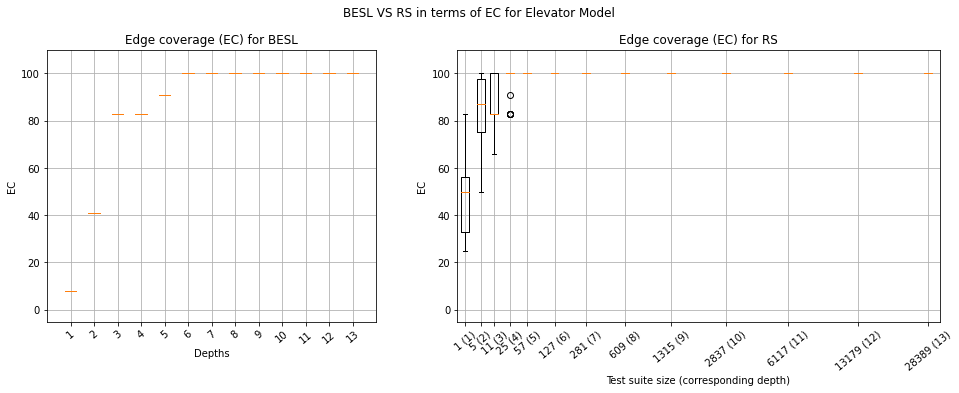

In [3]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
labels after:  ['1 (1)', '5 (2)', '11 (3)', '25 (4)', '57 (5)', '127 (6)', '281 (7)', '609 (8)', '1315 (9)', '2837 (10)', '6117 (11)', '13179 (12)', '28389 (13)']


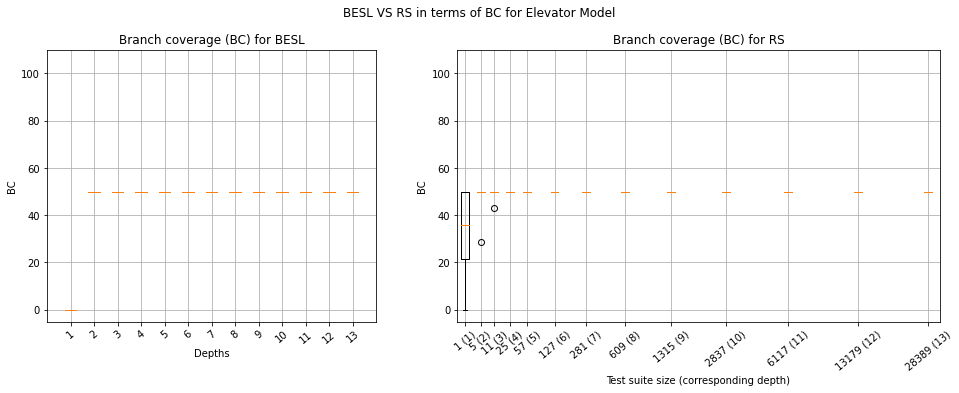

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
labels after:  ['1 (1)', '5 (2)', '11 (3)', '25 (4)', '57 (5)', '127 (6)', '281 (7)', '609 (8)', '1315 (9)', '2837 (10)', '6117 (11)', '13179 (12)', '28389 (13)']


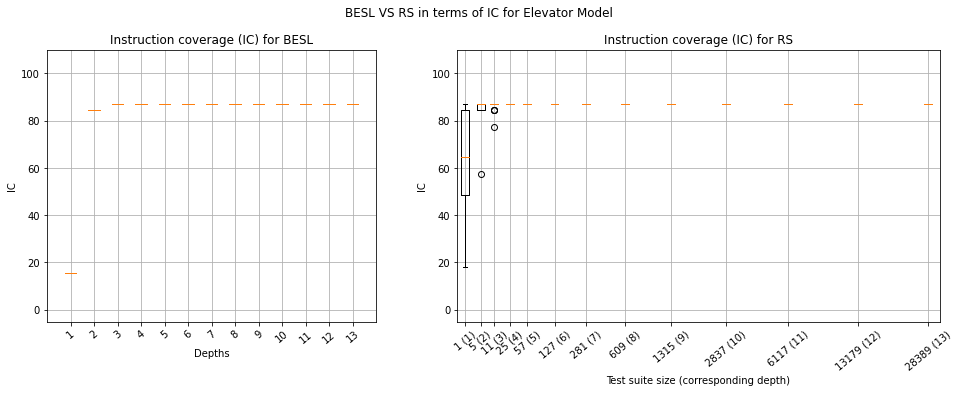

In [5]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
labels after:  ['1 (1)', '5 (2)', '11 (3)', '25 (4)', '57 (5)', '127 (6)', '281 (7)', '609 (8)', '1315 (9)', '2837 (10)', '6117 (11)', '13179 (12)', '28389 (13)']


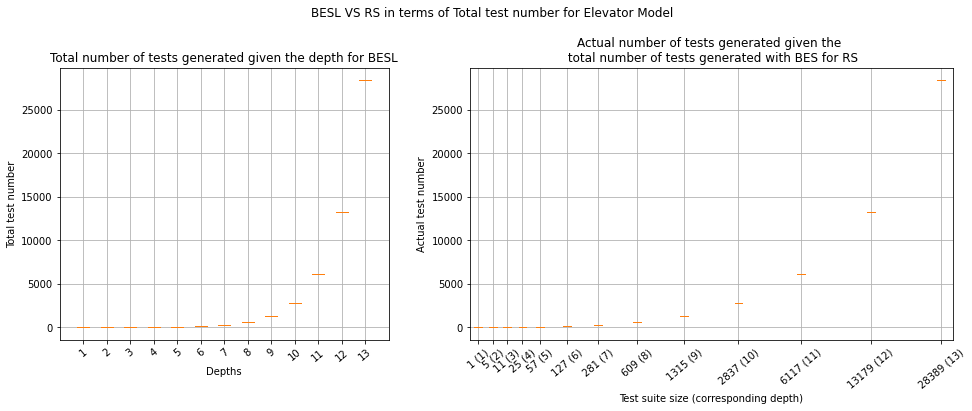

In [6]:
# total_test
creteria = 'total_tests'
data_map['need_y_limit'] = False

data_map['bes_title'] = f'Total number of tests generated given the depth for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
labels after:  ['1 (1)', '5 (2)', '11 (3)', '25 (4)', '57 (5)', '127 (6)', '281 (7)', '609 (8)', '1315 (9)', '2837 (10)', '6117 (11)', '13179 (12)', '28389 (13)']


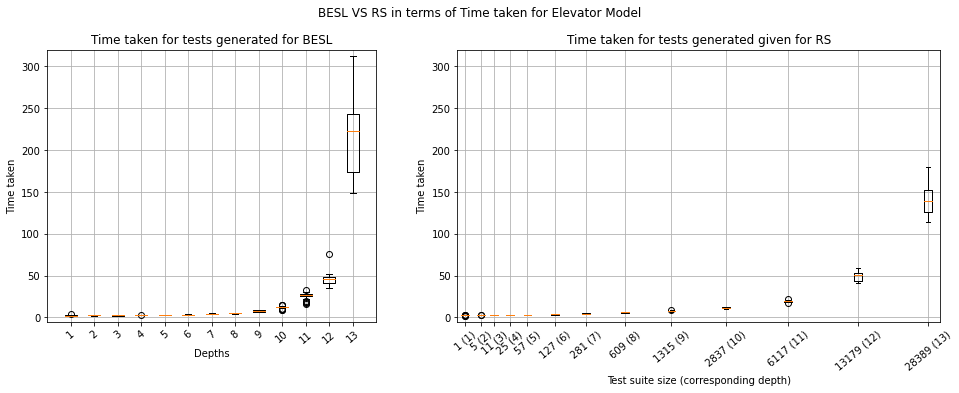

In [7]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']: 1


data_map['need_y_limit'] = True
data_map['y_bes_lim'] = 320
data_map['y_rand_lim'] = 320

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)


data_map['need_y_limit'] = False
data_map['y_bes_lim'] = 110
data_map['y_rand_lim'] = 110



trie_total   : [1, 5, 11, 27, 67, 159, 375, 887, 2095, 4943, 11663, 27519, 64927]
actual before: [1, 5, 11, 25, 57, 127, 281, 609, 1315, 2837, 6117, 13179, 28389]
actual after : [1, 5, 11, 25, 57, 127, 281, 609, 1315, 2837, 6117, 13179, 28389]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 5 & 5  \\ \hline
3 & 11 & 11  \\ \hline
4 & 27 & 25  \\ \hline
5 & 67 & 57  \\ \hline
6 & 159 & 127  \\ \hline
7 & 375 & 281  \\ \hline
8 & 887 & 609  \\ \hline
9 & 2095 & 1315  \\ \hline
10 & 4943 & 2837  \\ \hline
11 & 11663 & 6117  \\ \hline
12 & 27519 & 13179  \\ \hline
13 & 64927 & 28389  \\ \hline
\end{tabular}
\end{table}
**********************


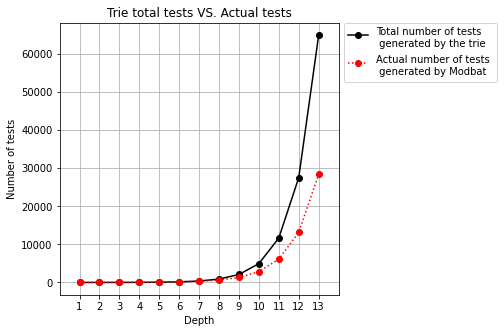

In [8]:

y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
# y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)

u_bes: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
u_random: [    1     5    10    19    40    77   144   276   526   991  1875  3553
  6714 12689 24001]
labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '5 (2)', '10 (3)', '19 (4)', '40 (5)', '77 (6)', '144 (7)', '276 (8)', '526 (9)', '991 (10)', '1875 (11)', '3553 (12)', '6714 (13)', '12689 (14)', '24001 (15)']


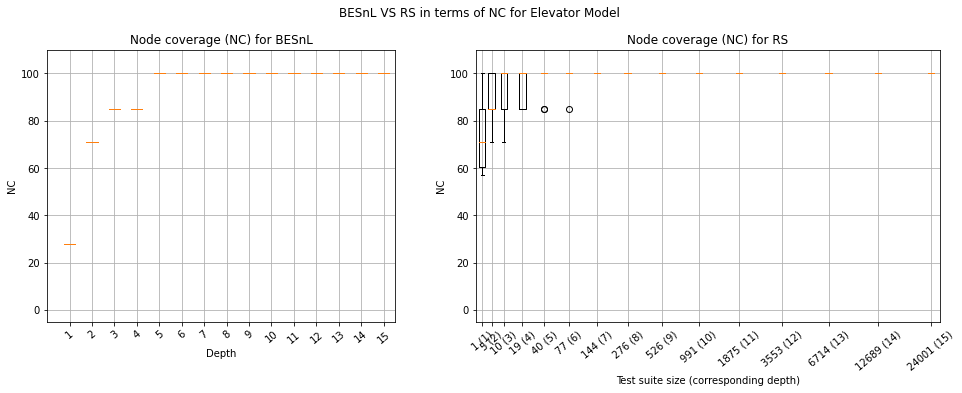

In [9]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
data_map['loopOpt'] = bool_to_str(loopOpt)
data_map['need_y_limit'] = True

# data_map['positions'] = [1, 2, 3.25, 4.5, 6, 8, 10.1, 14, 17, 20.2, 24, 30, 38, 48]
# data_map['positions'] = [1, 2.5, 4.25, 6.25, 8.5, 12, 16, 21, 27, 34, 42, 51, 60, 70, 81]
data_map['positions'] = [1, 2.5, 4.5, 7.5, 11, 15, 19.5, 24.5, 30, 36, 42.5, 49.5, 57, 65, 73.5]


data_map['box_width_bes'] = .6
data_map['box_width_rand'] = 1

data_map['x_rand_lim'] = 75
data_map['x_bes_lim'] = 15.5

coverage = 'NC'

data_map['bes_title'] = f'Node coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage

data_map['rand_title'] = f'Node coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage

data_map['width_rand_ratio']= 2


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '5 (2)', '10 (3)', '19 (4)', '40 (5)', '77 (6)', '144 (7)', '276 (8)', '526 (9)', '991 (10)', '1875 (11)', '3553 (12)', '6714 (13)', '12689 (14)', '24001 (15)']


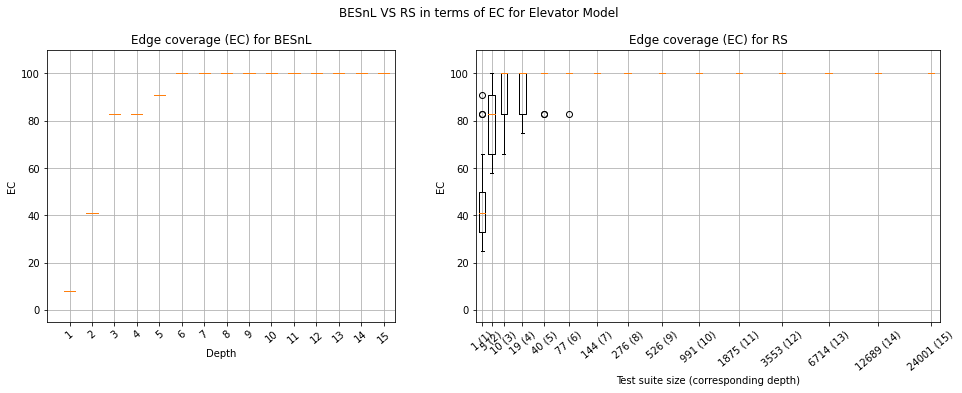

In [10]:
# ec 
coverage = 'EC'
data_map['bes_title'] = f'Edge coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Edge coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, data_map)



labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '5 (2)', '10 (3)', '19 (4)', '40 (5)', '77 (6)', '144 (7)', '276 (8)', '526 (9)', '991 (10)', '1875 (11)', '3553 (12)', '6714 (13)', '12689 (14)', '24001 (15)']


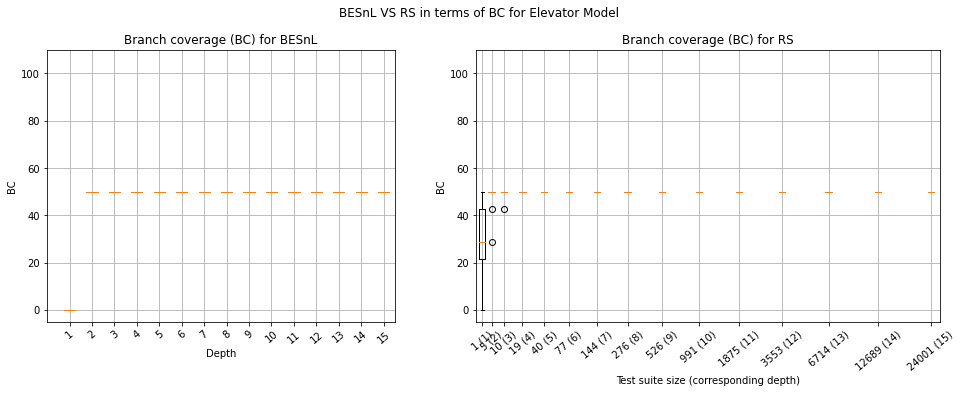

In [11]:
# bc
coverage = 'BC'  #TODO here bc are the same
data_map['bes_title'] = f'Branch coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 13019

data_map['rand_title'] = f'Branch coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '5 (2)', '10 (3)', '19 (4)', '40 (5)', '77 (6)', '144 (7)', '276 (8)', '526 (9)', '991 (10)', '1875 (11)', '3553 (12)', '6714 (13)', '12689 (14)', '24001 (15)']


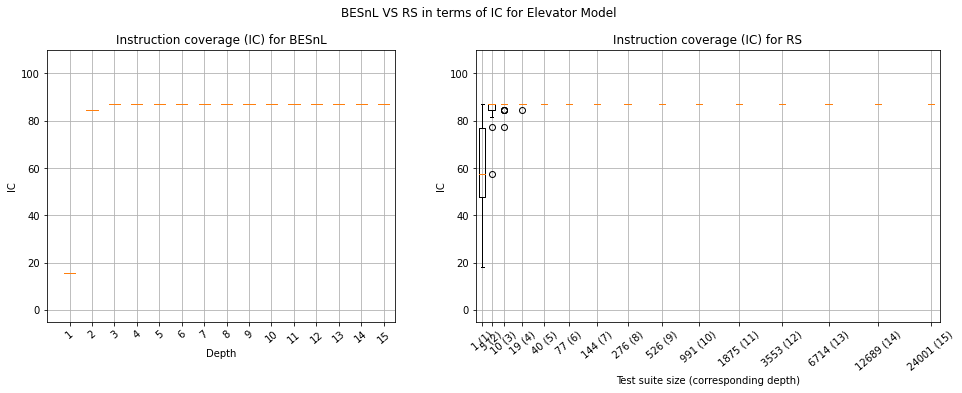

In [12]:
# ic
coverage = 'IC'
data_map['bes_title'] = f'Instruction coverage ({coverage}) for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = coverage
# 'width_ratio': 1

data_map['rand_title'] = f'Instruction coverage ({coverage}) for RS'
data_map['y_rand_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, data_map)
    

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '5 (2)', '10 (3)', '19 (4)', '40 (5)', '77 (6)', '144 (7)', '276 (8)', '526 (9)', '991 (10)', '1875 (11)', '3553 (12)', '6714 (13)', '12689 (14)', '24001 (15)']


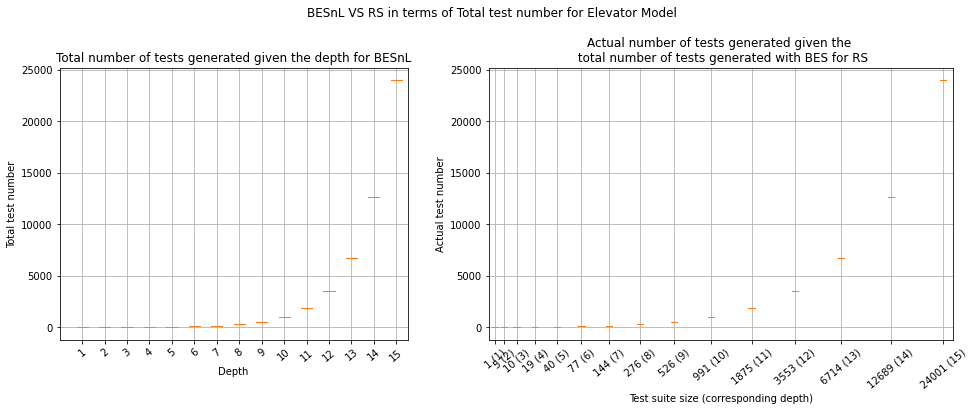

In [13]:
# total_test
creteria = 'total_tests'
data_map['need_y_limit'] = False

data_map['bes_title'] = f'Total number of tests generated given the depth for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Total test number'
# 'width_ratio': 1
data_map['distance_to_figures'] = 1.05

data_map['rand_title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
data_map['y_rand_label'] = 'Actual test number'
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)

labels after:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
labels after:  ['1 (1)', '5 (2)', '10 (3)', '19 (4)', '40 (5)', '77 (6)', '144 (7)', '276 (8)', '526 (9)', '991 (10)', '1875 (11)', '3553 (12)', '6714 (13)', '12689 (14)', '24001 (15)']


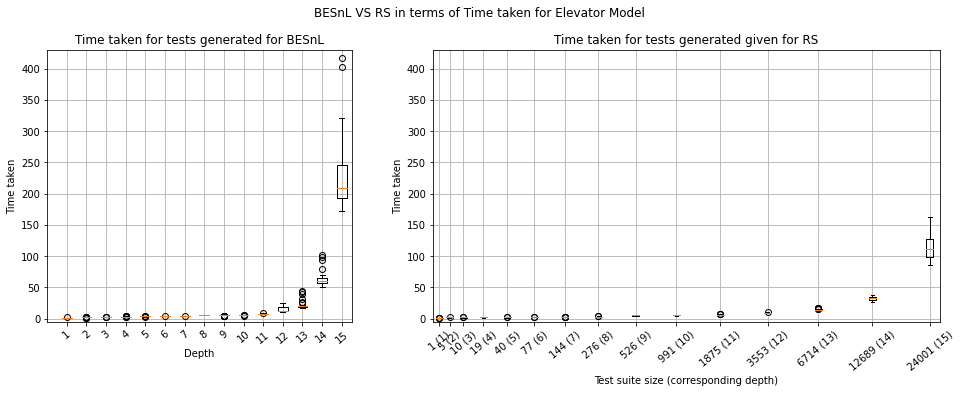

In [14]:
# time_taken
creteria = 'time_taken'
data_map['bes_title'] = f'Time taken for tests generated for BES{bool_to_shortcut(loopOpt)}'
data_map['y_bes_label'] = 'Time taken'
data_map['distance_to_figures'] = 1

data_map['rand_title'] = f'Time taken for tests generated given for RS'
data_map['y_rand_label'] = 'Time taken'
data_map['width_rand_ratio']= 2.5


data_map['need_y_limit'] = True
data_map['y_bes_lim'] = 430
data_map['y_rand_lim'] = 430

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, data_map)

data_map['need_y_limit'] = False
data_map['y_bes_lim'] = 110
data_map['y_rand_lim'] = 110





trie_total   : [1, 5, 10, 21, 49, 102, 207, 437, 916, 1887, 3917, 8164, 16933, 35113, 72962]
actual before: [1, 5, 10, 19, 40, 77, 144, 276, 526, 991, 1875, 3553, 6714, 12689, 24001]
actual after : [1, 5, 10, 19, 40, 77, 144, 276, 526, 991, 1875, 3553, 6714, 12689, 24001]
**********************
\begin{table}[trie vs actual]
\begin{tabular}{|c||c|c|}
\hline
& Depth & Total number of tests generated by the trie & Actual number of tests generated by Modbat \\ \hline \hline
1 & 1 & 1  \\ \hline
2 & 5 & 5  \\ \hline
3 & 10 & 10  \\ \hline
4 & 21 & 19  \\ \hline
5 & 49 & 40  \\ \hline
6 & 102 & 77  \\ \hline
7 & 207 & 144  \\ \hline
8 & 437 & 276  \\ \hline
9 & 916 & 526  \\ \hline
10 & 1887 & 991  \\ \hline
11 & 3917 & 1875  \\ \hline
12 & 8164 & 3553  \\ \hline
13 & 16933 & 6714  \\ \hline
14 & 35113 & 12689  \\ \hline
15 & 72962 & 24001  \\ \hline
\end{tabular}
\end{table}
**********************


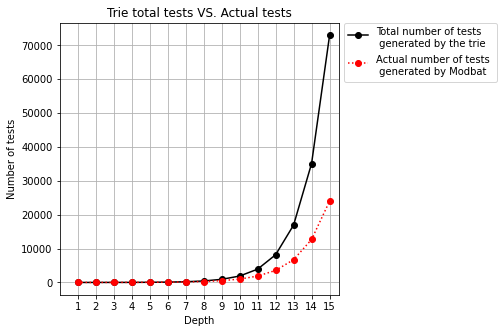

In [15]:

y1 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'trie_total_path')
print(f'trie_total   : {y1}')
y2 = extract_unique_as_list(bes_csv, u_bes, 'depth', 'total_tests')
print(f'actual before: {y2}')
# y2[7] = 2858
print(f'actual after : {y2}')


print("**********************")
latex = to_latex_compare('trie vs actual', u_bes, y1, y2)
print(latex)
print("**********************")




data_map['bes_title'] = f'Trie total tests VS. Actual tests'
data_map['x_bes_label'] = 'Depth'
data_map['y_bes_label'] = 'Number of tests'

data_map['y1_label'] = 'Total number of tests \n generated by the trie'
data_map['y2_label'] = 'Actual number of tests \n generated by Modbat'


plot_one_linear(u_bes, y1, y2, data_map)

In [16]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





